In [1]:
import os
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
import os
#os.getcwd()

In [10]:
confirmed = pd.read_csv("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/Raw_Covid19_Data/time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/Raw_Covid19_Data/time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/Raw_Covid19_Data/time_series_covid19_deaths_global.csv")
confirmed = confirmed.copy().drop(['Province/State', "Lat", "Long"],axis =1)
recovered = recovered.copy().drop(['Province/State', "Lat", "Long"],axis =1)
deaths = deaths.copy().drop(['Province/State', "Lat", "Long"],axis =1)

### Global Reported Cases till Date

In [11]:
print("Global Reported Cases till Date")
pd.DataFrame(data = {"Confirmed": [confirmed.iloc[:,-1].sum()],
                     "Recovered": [recovered.iloc[:,-1].sum()],
                     "Deaths": [deaths.iloc[:,-1].sum()],
                     "Active": [confirmed.iloc[:,-1].sum() - recovered.iloc[:,-1].sum() - deaths.iloc[:,-1].sum()],
                     "Mortality Rate(%)": [deaths.iloc[:,-1].sum()/confirmed.iloc[:,-1].sum()*100]}).style.set_properties(**{'text-align': 'center'})

Global Reported Cases till Date


,Confirmed,Recovered,Deaths,Active,Mortality Rate(%)
0,13805296,7711525,589911,5503860,4.27308


### Country Wise Reported Cases

In [12]:
country_df = pd.concat([confirmed.iloc[:,np.array([0,-1])].groupby('Country/Region').sum(),
                        deaths.iloc[:,np.array([0,-1])].groupby('Country/Region').sum(),
                        recovered.iloc[:,np.array([0,-1])].groupby('Country/Region').sum()], 
                        axis=1, join='inner')
country_df.columns = ["Confirmed", "Death", "Recovered"]
country_df["Active"] = country_df["Confirmed"] - country_df["Death"] - - country_df["Recovered"]
country_df["Mortality_Rate"] = country_df["Death"]/country_df["Confirmed"]
country_df.sort_values(by = ["Confirmed"], ascending = False).head()

,Confirmed,Death,Recovered,Active,Mortality_Rate
Country/Region,,,,,
US,3576157,138358,1090645,4528444,0.038689
Brazil,2012151,76688,1397531,3332994,0.038112
India,1003832,25602,635757,1613987,0.025504
Russia,751612,11920,530801,1270493,0.015859
Peru,341586,12615,230994,559965,0.036931


### Global Trends

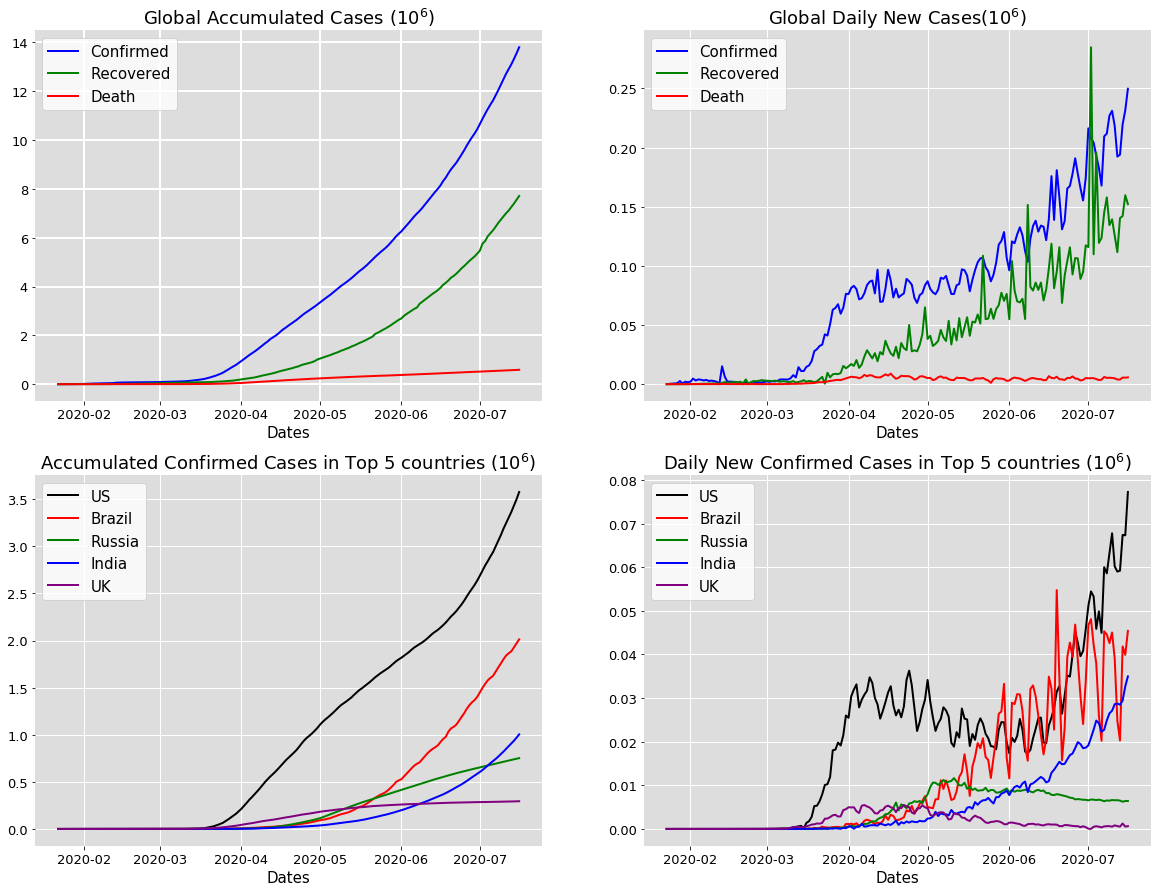

In [5]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(2,2,1, facecolor='#dddddd', axisbelow=True)
d = [datetime.strptime(date,'%m/%d/%y') for date in confirmed.sum(axis = 0).index[1:]]
ax.plot(d, np.array(confirmed.sum(axis = 0))[1:]/1e6, 'b', alpha=1, lw=2, label='Confirmed')#
ax.plot(d, np.array(recovered.sum(axis = 0))[1:]/1e6, 'g', alpha=1, lw=2, label='Recovered')#
ax.plot(d, np.array(deaths.sum(axis = 0))[1:]/1e6, 'r', alpha=1, lw=2, label='Death')#
ax.set_xlabel('Dates', size = 15)
#ax.set_ylabel('Number of countries affected', size = 15)
#ax.set_ylim(-0.1,1.2)
# ax.yaxis.set_tick_params(length=1)
# ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize = 15)
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title('Global Accumulated Cases '+ r"$(10^6)$", fontsize = 18)


coutry_confirmed = confirmed.groupby('Country/Region').sum().sort_values(by = '6/14/20', ascending = False)
coutry_recovered = recovered.groupby('Country/Region').sum().sort_values(by = '6/14/20', ascending = False)
coutry_deaths = deaths.groupby('Country/Region').sum().sort_values(by = '6/14/20', ascending = False)
ax = fig.add_subplot(2,2,2, facecolor='#dddddd', axisbelow=True)
d = [datetime.strptime(date,'%m/%d/%y') for date in confirmed.sum(axis = 0).index[2:]]

ax.plot(d, (np.array(confirmed.sum(axis = 0))[2:] - np.array(confirmed.sum(axis = 0))[1:-1])/1e6, 
        'b', alpha= 1, lw=2, label='Confirmed')
ax.plot(d, (np.array(recovered.sum(axis = 0))[2:] - np.array(recovered.sum(axis = 0))[1:-1])/1e6, 
        'g', alpha= 1, lw=2, label='Recovered')
ax.plot(d, (np.array(deaths.sum(axis = 0))[2:] - np.array(deaths.sum(axis = 0))[1:-1])/1e6, 
        'r', alpha= 1, lw=2, label='Death')
legend = ax.legend(fontsize = 15)
ax.set_xlabel('Dates', size = 15)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title('Global Daily New Cases' + r"$(10^6)$", fontsize = 18)

ax = fig.add_subplot(2,2,3, facecolor='#dddddd', axisbelow=True)
d = [datetime.strptime(date,'%m/%d/%y') for date in coutry_confirmed.columns]
ax.plot(d, coutry_confirmed.iloc[0]/1e6, 'black', alpha= 1, lw=2, label = "US")
ax.plot(d, coutry_confirmed.iloc[1]/1e6, 'red', alpha= 1, lw=2, label = 'Brazil')
ax.plot(d, coutry_confirmed.iloc[2]/1e6, 'green', alpha= 1, lw=2, label = 'Russia')
ax.plot(d, coutry_confirmed.iloc[3]/1e6, 'blue', alpha= 1, lw=2, label = 'India')
ax.plot(d, coutry_confirmed.iloc[4]/1e6, 'purple', alpha= 1, lw=2, label = "UK")
#ax.plot(d, coutry_confirmed.iloc[5]/1e6, 'grey', alpha= 1, lw=2, label = 'Spain')
ax.set_xlabel('Dates', size = 15)
#ax.set_ylabel('Number of Confirmed Cases ' + r"$(10^6)$", size = 15)
ax.ticklabel_format(axis = 'y', style = "scientific")
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend(fontsize = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('Accumulated Confirmed Cases in Top 5 countries '+ r"$(10^6)$", fontsize = 18)

ax = fig.add_subplot(2,2,4, facecolor='#dddddd', axisbelow=True)
d = [datetime.strptime(date,'%m/%d/%y') for date in coutry_confirmed.columns]
ax.plot(d[1:], np.diff(coutry_confirmed.iloc[0])/1e6, 'black', alpha= 1, lw=2, label = "US")
ax.plot(d[1:], np.diff(coutry_confirmed.iloc[1])/1e6, 'red', alpha= 1, lw=2, label = 'Brazil')
ax.plot(d[1:], np.diff(coutry_confirmed.iloc[2])/1e6, 'green', alpha= 1, lw=2, label = 'Russia')
ax.plot(d[1:], np.diff(coutry_confirmed.iloc[3])/1e6, 'blue', alpha= 1, lw=2, label = 'India')
ax.plot(d[1:], np.diff(coutry_confirmed.iloc[4])/1e6, 'purple', alpha= 1, lw=2, label = "UK")
#ax.plot(d[1:], np.diff(coutry_confirmed.iloc[5]), 'grey', alpha= 1, lw=2, label = 'Spain')
ax.set_xlabel('Dates', size = 15)
#ax.set_ylabel('Number of Confirmed Cases ' + r"$(10^6)$", size = 15)
ax.ticklabel_format(axis = 'y', style = "scientific")
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend(fontsize = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('Daily New Confirmed Cases in Top 5 countries '+ r"$(10^6)$", fontsize = 18)

#plt.savefig("global.png", dpi = 200 , bbox_inches = "tight")    
plt.show()

### Country Wise Correlation

In [15]:
# def crosscorr(datax, datay, lag=0, wrap=False):
#     """ Lag-N cross correlation. 
#     Shifted data filled with NaNs 
    
#     Parameters
#     ----------
#     lag : int, default 0
#     datax, datay : pandas.Series objects of equal length
#     Returns
#     ----------
#     crosscorr : float
#     """
#     if wrap:
#         shiftedy = datay.shift(lag)
#         shiftedy.iloc[:lag] = datay.iloc[-lag:].values
#         return datax.corr(shiftedy)
#     else: 
#         return datax.corr(datay.shift(lag))
    
# d1 = coutry_confirmed.loc['US']
# d2 = coutry_confirmed.loc['India']
# seconds = 5
# fps = 20
# rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
# offset = np.ceil(len(rs)/2)-np.argmax(rs)
# f,ax=plt.subplots(figsize=(14,3))
# ax.plot(rs)
# ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
# ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
# ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
# #ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# #ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
# plt.legend()

In [17]:
# def pairwise_corr(df):
#     corrs = np.zeros((len(df.index), len(df.index)))
#     for i in range(len(df.index)):
#         for j in range(len(df.index)):
#             name1 = df.index[i]
#             name2 = df.index[j]
#             corrs[i,j] = np.max([crosscorr(df.loc[name1], df.loc[name2], lag) for lag in range(-100, 100)])
#     return corrs

# coutry_confirmed[:10].transpose().corr()

# #cor_matrix = pairwise_corr(coutry_confirmed[:8])
# fig = plt.figure(figsize=(8, 6))
# sn.heatmap(coutry_confirmed[:8].transpose().corr().values, annot=True, xticklabels = list(coutry_confirmed[:8].index), 
#            yticklabels = list(coutry_confirmed[:8].index))
# #plt.savefig("correlation.png", dpi = 400 , bbox_inches = "tight")    
# #coutry_confirmed[:10].transpose().corr()

## US trend

In [13]:
us_df = pd.read_csv("/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/Raw_Covid19_Data/time_series_covid19_confirmed_US.csv")
us_df_top = us_df.groupby('Province_State').sum().sort_values(by = "6/14/20", ascending = False).drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_'], axis = 1)[:10]

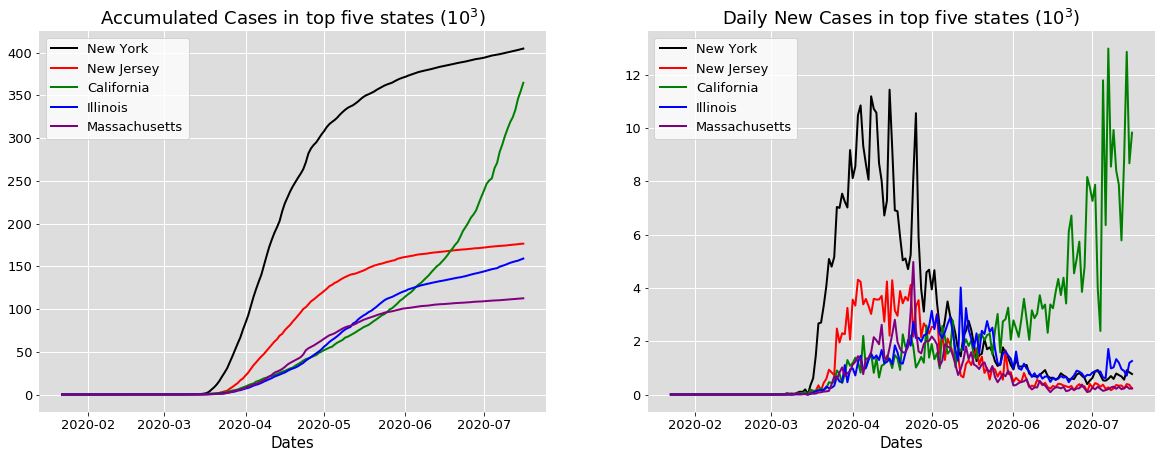

In [8]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(1,2,1, facecolor='#dddddd', axisbelow=True)
d = [datetime.strptime(date,'%m/%d/%y') for date in us_df_top.columns]
ax.plot(d, us_df_top.iloc[0]/1e3, 'black', alpha= 1, lw=2, label = us_df_top.index[0])
ax.plot(d, us_df_top.iloc[1]/1e3, 'red', alpha= 1, lw=2, label = us_df_top.index[1])
ax.plot(d, us_df_top.iloc[2]/1e3, 'green', alpha= 1, lw=2, label = us_df_top.index[2])
ax.plot(d, us_df_top.iloc[3]/1e3, 'blue', alpha= 1, lw=2, label = us_df_top.index[3])
ax.plot(d,us_df_top.iloc[4]/1e3, 'purple', alpha= 1, lw=2, label = us_df_top.index[4])
#ax.plot(d[1:], np.diff(coutry_confirmed.iloc[5]), 'grey', alpha= 1, lw=2, label = 'Spain')
ax.set_xlabel('Dates', size = 15)
#ax.set_ylabel('Number of Confirmed Cases ' + r"$(10^6)$", size = 15)
ax.ticklabel_format(axis = 'y', style = "scientific")
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend(fontsize = 13)
plt.xticks(size = 13)
plt.yticks(size = 13)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('Accumulated Cases in top five states '+ r"$(10^3)$", fontsize = 18)

ax = fig.add_subplot(1,2,2, facecolor='#dddddd', axisbelow=True)
d = [datetime.strptime(date,'%m/%d/%y') for date in us_df_top.columns]
ax.plot(d[1:], np.diff(us_df_top.iloc[0])/1e3, 'black', alpha= 1, lw=2, label = us_df_top.index[0])
ax.plot(d[1:], np.diff(us_df_top.iloc[1])/1e3, 'red', alpha= 1, lw=2, label = us_df_top.index[1])
ax.plot(d[1:], np.diff(us_df_top.iloc[2])/1e3, 'green', alpha= 1, lw=2, label = us_df_top.index[2])
ax.plot(d[1:], np.diff(us_df_top.iloc[3])/1e3, 'blue', alpha= 1, lw=2, label = us_df_top.index[3])
ax.plot(d[1:], np.diff(us_df_top.iloc[4])/1e3, 'purple', alpha= 1, lw=2, label = us_df_top.index[4])
#ax.plot(d[1:], np.diff(coutry_confirmed.iloc[5]), 'grey', alpha= 1, lw=2, label = 'Spain')
ax.set_xlabel('Dates', size = 15)
#ax.set_ylabel('Number of Confirmed Cases ' + r"$(10^6)$", size = 15)
ax.ticklabel_format(axis = 'y', style = "scientific")
ax.grid(b=True, which='major', c='w', lw=1, ls='-')
legend = ax.legend(fontsize = 13)
plt.xticks(size = 13)
plt.yticks(size = 13)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('Daily New Cases in top five states '+ r"$(10^3)$", fontsize = 18)
#plt.savefig("US.png", dpi = 200 , bbox_inches = "tight")  

In [2]:
direc = "/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/US_Reports/"
list_csv = sorted(os.listdir(direc))[2:]

us = []
for file in list_csv:
    sample = pd.read_csv(direc + file).set_index("Province_State")[["Confirmed",  "Recovered", "Deaths"]].sort_values(by = "Confirmed", ascending = False)
    us.append(sample.drop(['Diamond Princess', 'Grand Princess']))
us = pd.concat(us, axis=1, join='inner') 
us_data = us.values.reshape(56,-1,3)
us_data[us_data!=us_data] = 0
us_data[:,:,1] += us_data[:,:,2]
us_index = sample.index

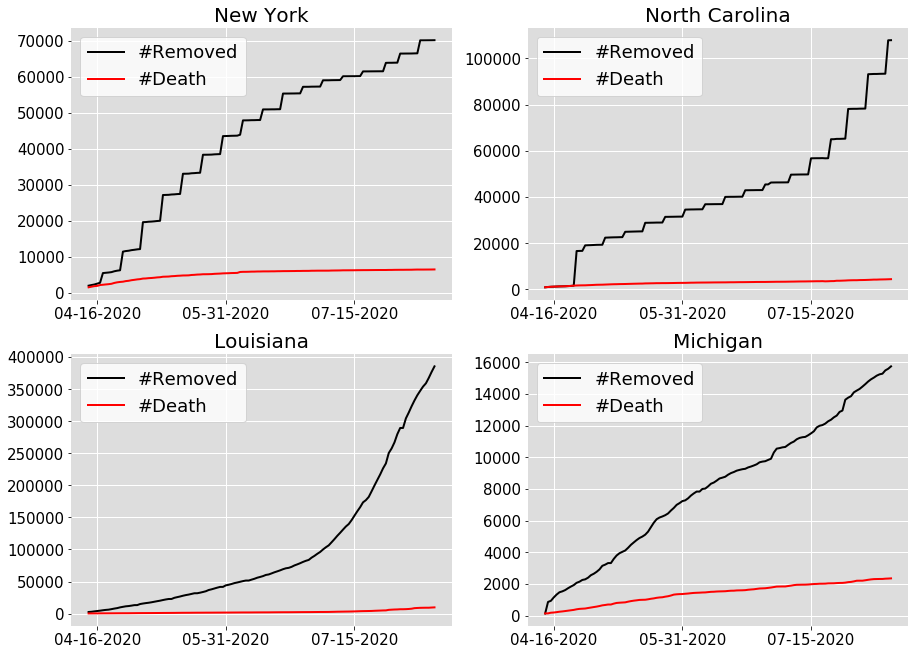

In [17]:
fig = plt.figure(figsize=(15, 11))
feat = 1
dates = np.array([date[:10] for date in list_csv])
idx = list(range(us_data.shape[1]))
#for i, cty in enumerate(us_index[np.array([3, 9, 17])]):
k = 0
for i in [3, 8,  9, 17]:
    cty = us_index[i]
    k+=1
    ax = fig.add_subplot(2,2, k, facecolor='#dddddd', axisbelow=True)
    d = np.array([datetime.strptime(date[:10],'%m-%d-%Y') for date in list_csv])
    ax.plot(idx, us_data[i, :, 1], 'black', alpha= 1, lw=2, label = "#Removed")
    ax.plot(idx, us_data[i, :, 2], 'red', alpha= 1, lw=2, label = "#Death")
    #ax.plot(d[1:], np.diff(coutry_confirmed.iloc[5]), 'grey', alpha= 1, lw=2, label = 'Spain')
    #ax.set_xlabel('Dates', size = 15)
    #ax.set_ylabel('Number of Confirmed Cases ' + r"$(10^6)$", size = 15)
    ax.ticklabel_format(axis = 'y', style = "scientific")
    ax.grid(b=True, which='major', c='w', lw=1, ls='-')
    legend = ax.legend(fontsize = 18)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.xticks(np.arange(3, 105, 45), dates[np.arange(3, 105, 45)], size = 15)
    #plt.xticks(size = 8)
    plt.yticks(size = 15)
    plt.title(cty, fontsize = 20)
#plt.savefig("R&D.png", dpi = 300 , bbox_inches = "tight")  

'Michigan'

(3, 17, 18)